# Binary Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
%matplotlib inline

In [2]:
train_df = pd.read_csv("working_data/trial_promo_training.csv")
test_df = pd.read_csv("working_data/trial_promo_testing.csv")

### Add binary target

In [3]:
train_df["decision_binary"] = train_df["decision"].apply(lambda x: 0 if x == "None" else 1)
test_df["decision_binary"] = test_df["decision"].apply(lambda x: 0 if x == "None" else 1)

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Data balancing using equal classes strategy

In [5]:
should_balance = False

In [6]:
number_of_nones = train_df[train_df["decision_binary"] == 0].shape[0]
nones_df = train_df[train_df["decision_binary"] == 0]
purchase_df = train_df[train_df["decision_binary"] == 1]
print("Number of None's: " + str(nones_df.shape[0]))
print("Increase purchase by: " + str(number_of_nones - purchase_df.shape[0]))
print("Number of purchase: " + str(purchase_df.shape[0]))
times_to_increase_purchase_df = (number_of_nones - purchase_df.shape[0])//purchase_df.shape[0]
print("Purchase records to be increased by {} times".format(times_to_increase_purchase_df))

Number of None's: 621
Increase purchase by: 492
Number of purchase: 129
Purchase records to be increased by 3 times


In [7]:
if should_balance:
    repeated_purchase = [purchase_df] * times_to_increase_purchase_df
    repeated_purchase_df = pd.concat(repeated_purchase)
    dfs_to_concat = [nones_df, repeated_purchase_df]
    train_df = pd.concat(dfs_to_concat)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print("New # rows: " + str(train_df.shape[0]))
    train_df.head()
else:
    print("Training data will not be balanced")

Training data will not be balanced


In [8]:
features_to_scale = ["age", "income", "avbal", "avtrans"]
columns_to_drop_for_nn = ["sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
target_columns = ["decision", "decision_binary"]
min_max_scaler = preprocessing.MinMaxScaler()
train_df[features_to_scale] = min_max_scaler.fit_transform(train_df[features_to_scale])

train_df.head()

,age,income,avbal,avtrans,decision,sexNum,mstatusNum,occupationNum,educationNum,childrenNum,...,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4,decision_binary
0,0.481241,0.120073,0.273538,0.324016,None,0,1,6,0,2,...,1,0,0,0,0,0,1,0,0,0
1,0.035354,0.120073,0.273538,0.324016,None,1,2,1,2,0,...,0,0,1,0,1,0,0,0,0,0
2,0.490188,0.026902,0.257021,0.151600,None,0,1,0,2,0,...,0,0,1,0,1,0,0,0,0,0
3,0.111688,0.120073,0.273538,0.324016,A,1,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
4,0.135354,0.193942,0.260347,0.138515,None,1,2,2,3,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
X_train = train_df.drop(target_columns, axis=1)
X_train = X_train.drop(columns_to_drop_for_nn, axis=1)
y_train = train_df["decision_binary"]
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.481241,0.120073,0.273538,0.324016,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.035354,0.120073,0.273538,0.324016,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.490188,0.026902,0.257021,0.151600,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.111688,0.120073,0.273538,0.324016,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.135354,0.193942,0.260347,0.138515,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [10]:
y_train.head()

0    0
1    0
2    0
3    1
4    0
Name: decision_binary, dtype: int64

In [11]:
test_df[features_to_scale] = min_max_scaler.transform(test_df[features_to_scale])
test_df.head()

X_test = test_df.drop(target_columns, axis=1)
X_test = X_test.drop(columns_to_drop_for_nn, axis=1)
y_test = test_df["decision_binary"]
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# Build different models

### Neural network

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Training accuracy

In [13]:
clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 8, 4), random_state= 42)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

[[606  15]
 [ 47  82]]
0.9173333333333333


### Testing accuracy

In [14]:
y_test_pred = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,183,24
1,36,7


In [15]:
print("accuracy:", accuracy_score(y_test, y_test_pred))

accuracy: 0.76


In [16]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8356,0.8841,0.8592,207
1,0.2258,0.1628,0.1892,43


## Random forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
columns_for_rf = ["age", "income", "avbal", "avtrans", "sexNum", "mstatusNum", "occupationNum", "educationNum", "childrenNum"]
X_train_rf = train_df[columns_for_rf]
y_train_rf = train_df["decision_binary"]

X_train_rf.head()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


,age,income,avbal,avtrans,sexNum,mstatusNum,occupationNum,educationNum,childrenNum
0,0.481241,0.120073,0.273538,0.324016,0,1,6,0,2
1,0.035354,0.120073,0.273538,0.324016,1,2,1,2,0
2,0.490188,0.026902,0.257021,0.151600,0,1,0,2,0
3,0.111688,0.120073,0.273538,0.324016,1,1,1,2,0
4,0.135354,0.193942,0.260347,0.138515,1,2,2,3,0


In [18]:
clf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=1000)
clf.fit(X_train_rf, y_train_rf)

y_train_pred = clf.predict(X_train_rf)
print(y_train_pred)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 

In [19]:
cf_matrix = confusion_matrix(y_train_rf, y_train_pred, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,621,0
1,21,108


In [20]:
print("train accuracy:", accuracy_score(y_train_rf, y_train_pred))

train accuracy: 0.972


In [21]:
X_test_rf = test_df[columns_for_rf]
y_test_rf = test_df["decision_binary"]

y_test_pred = clf.predict(X_test_rf)
cf_matrix = confusion_matrix(y_test_rf, y_test_pred)
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,206,1
1,41,2


In [22]:
print("test accuracy:", accuracy_score(y_test_rf, y_test_pred))

test accuracy: 0.832


In [23]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_rf, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8340,0.9952,0.9075,207
1,0.6667,0.0465,0.0870,43


## XGBoost Classifier

In [24]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7,10], 'min_child_weight': [1,3,5,7]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params,
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
optimized_GBM.fit(X_train_rf, y_train_rf)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_child_weight': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [26]:
optimized_GBM.grid_scores_

[mean: 0.78667, std: 0.00847, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.78933, std: 0.01071, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.79867, std: 0.01337, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.79200, std: 0.01264, params: {'max_depth': 3, 'min_child_weight': 7},
 mean: 0.79067, std: 0.01308, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.79200, std: 0.02190, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.79467, std: 0.01051, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.79067, std: 0.01458, params: {'max_depth': 5, 'min_child_weight': 7},
 mean: 0.79333, std: 0.00631, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.78667, std: 0.01189, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.79333, std: 0.01756, params: {'max_depth': 7, 'min_child_weight': 5},
 mean: 0.79333, std: 0.01706, params: {'max_depth': 7, 'min_child_weight': 7},
 mean: 0.79600, std: 0.01387, params: {'max_depth': 

In [27]:
y_test_pred = optimized_GBM.predict(X_test_rf)
cf_matrix = confusion_matrix(y_test_rf, y_test_pred)
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1
0,192,15
1,35,8


In [28]:
print("test accuracy:", accuracy_score(y_test_rf, y_test_pred))

test accuracy: 0.8


In [29]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test_rf, y_test_pred, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8458,0.9275,0.8848,207
1,0.3478,0.1860,0.2424,43


### Build a neural network using Keras

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(42)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [31]:
X_train.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.481241,0.120073,0.273538,0.324016,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.035354,0.120073,0.273538,0.324016,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.490188,0.026902,0.257021,0.151600,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.111688,0.120073,0.273538,0.324016,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0.135354,0.193942,0.260347,0.138515,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [32]:
num_features = X_train.shape[1]
print("num_features:", num_features)

num_features: 28


In [33]:
# create model
num_features = X_train.shape[1]
model = Sequential()
model.add(Dense(12, input_dim=num_features, activation='relu', init='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

model.summary()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=28, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                348       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 24        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total para

In [34]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=2)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes=2)

In [36]:
es = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None)
checkpoint = ModelCheckpoint('models/model-{epoch:03d}-{val_acc:.2f}.h5', verbose=0, monitor='val_acc',save_best_only=True, mode='auto')  

In [37]:
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=50, verbose=0, validation_data = (X_test, y_test_one_hot), callbacks = [es, checkpoint])

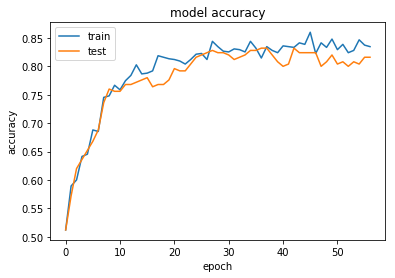

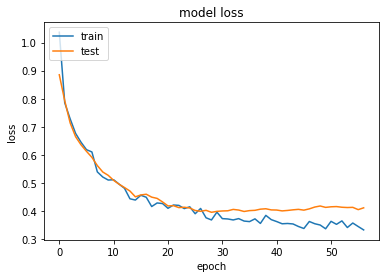

In [38]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training confusion matrix and accuracy

In [39]:
keras_nn_predictions_train = model.predict(X_train)
keras_nn_predictions_train = np.argmax(keras_nn_predictions_train, axis=1)
cf_matrix = confusion_matrix(y_train, keras_nn_predictions_train, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,617,4
1,109,20


In [40]:
print("train accuracy:", accuracy_score(y_train, keras_nn_predictions_train))

train accuracy: 0.8493333333333334


### Testing confusion matrix and accuracy

In [41]:
X_test.head()

,age,income,avbal,avtrans,sex_F,sex_M,mstatus_divorced,mstatus_married,mstatus_single,mstatus_widowed,...,occupation_retired,education_postgrad,education_professional,education_secondary,education_tertiary,children_0,children_1,children_2,children_3,children_4
0,0.704906,0.080506,0.063522,0.100964,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
1,0.139105,0.088530,0.232708,0.122881,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,0.514719,0.300505,0.338760,0.089771,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.148052,0.346235,0.180242,0.390105,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0.425830,0.556900,0.231039,0.484708,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
# evaluate the model
scores = model.evaluate(X_test, y_test_one_hot)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

250/250 [==============================] - 0s 24us/step

acc: 81.60%


In [43]:
keras_nn_predictions = model.predict(X_test)
len(keras_nn_predictions)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
len(keras_nn_predictions)
keras_nn_predictions
cf_matrix = confusion_matrix(y_test, keras_nn_predictions, labels=[0, 1])
df_cm = pd.DataFrame(
    cf_matrix, index=[0, 1], columns=[0, 1], 
)
df_cm

,0,1
0,202,5
1,41,2


In [44]:
print("test accuracy:", accuracy_score(y_test, keras_nn_predictions))

test accuracy: 0.816


In [45]:
precision, recall, fscore, support = precision_recall_fscore_support(y_test, keras_nn_predictions, labels=[0, 1])
score_dict = {
  "precision": precision.round(4),
  "recall": recall.round(4),
  "f1-score": fscore.round(4),
  "support": support
}
score_df = pd.DataFrame(score_dict, index=[0, 1])
score_df

,precision,recall,f1-score,support
0,0.8313,0.9758,0.8978,207
1,0.2857,0.0465,0.0800,43


# Save the best model for later usage

In [ ]:
model.save('models/NN_66_40.h5')

### Load the model and check

In [ ]:
model_name = "NN_66_40.h5"

In [ ]:
from keras.models import load_model
model = load_model('models/'+model_name)
keras_nn_predictions = model.predict(X_test)
keras_nn_predictions = np.argmax(keras_nn_predictions, axis=1)
cm = confusion_matrix(y_test, keras_nn_predictions)
print(cm)
print(accuracy_score(y_test, keras_nn_predictions))

In [ ]:
plot_confusion_matrix(cm, classes=["A", "B", "None"],
                      title='Confusion matrix, without normalization')

### This model gives less than 50 % class accuracy on products A and B and predicts it as none